In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

%matplotlib inline

In [2]:
cust = pd.read_csv('Customer.csv')
prod_cat_info = pd.read_csv('prod_cat_info.csv')
transaction = pd.read_csv('Transactions.csv')

In [3]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


In [7]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [8]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [9]:
df_trans_ProdCatInfo = pd.merge(left=transaction, right=prod_cat_info, how='left', left_on=['prod_cat_code','prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])

In [10]:
df_trans_ProdCatInfo

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children


In [11]:
retail_data = pd.merge(left=df_trans_ProdCatInfo, right=cust, how='left', left_on= ['cust_id'], right_on=['customer_Id'] )

In [12]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  prod_subcat        23053 non-null  object 
 13  customer_Id        23053 non-null  int64  
 14  DOB                23053 non-null  object 
 15  Gender             23044 non-null  object 
 16  city_code          230

In [13]:
import re

In [14]:
# Define a regular expression pattern for date
pattern = r"(\d{1,2})[-/](\d{1,2})[-/](\d{4})"

retail_data['tran_date'] = retail_data['tran_date'].str.extract(pattern).apply(lambda x:'-'.join(x),axis=1) 

# parsing the date in proper format to convert into datetime datatype

In [15]:
retail_data['tran_date'] = pd.to_datetime(retail_data['tran_date'])

/var/folders/sk/xnwrnggj79d9d6sghf_k26w40000gn/T/ipykernel_1144/3935259712.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  retail_data['tran_date'] = pd.to_datetime(retail_data['tran_date'])


In [16]:
# parsing the date in proper format to convert into datetime datatype
retail_data['DOB'] = retail_data['DOB'].str.extract(pattern).apply(lambda x:'-'.join(x),axis=1)

In [17]:
retail_data['DOB'] = pd.to_datetime(retail_data['DOB'])

/var/folders/sk/xnwrnggj79d9d6sghf_k26w40000gn/T/ipykernel_1144/370510709.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  retail_data['DOB'] = pd.to_datetime(retail_data['DOB'])


In [18]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_sub_cat_code  23053 non-null  int64         
 12  prod_subcat        23053 non-null  object        
 13  customer_Id        23053 non-null  int64         
 14  DOB   

In [19]:
retail_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0


In [20]:
Customer_Final = retail_data.drop(['prod_sub_cat_code', 'prod_cat_code', 'prod_subcat_code'], axis=1)

In [21]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [22]:
# Q1: Get the column names and their corresponding data types

Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  23053 non-null  int64         
 1   cust_id         23053 non-null  int64         
 2   tran_date       23053 non-null  datetime64[ns]
 3   Qty             23053 non-null  int64         
 4   Rate            23053 non-null  int64         
 5   Tax             23053 non-null  float64       
 6   total_amt       23053 non-null  float64       
 7   Store_type      23053 non-null  object        
 8   prod_cat        23053 non-null  object        
 9   prod_subcat     23053 non-null  object        
 10  customer_Id     23053 non-null  int64         
 11  DOB             23053 non-null  datetime64[ns]
 12  Gender          23044 non-null  object        
 13  city_code       23045 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(5), object(4)


In [23]:
# Q2: Top/Bottom 10 observations
Customer_Final.head(10) # Top 10 Observations

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [24]:
Customer_Final.tail(10) # Bottom 10 Observations

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


In [25]:
Customer_Final.dtypes

transaction_id             int64
cust_id                    int64
tran_date         datetime64[ns]
Qty                        int64
Rate                       int64
Tax                      float64
total_amt                float64
Store_type                object
prod_cat                  object
prod_subcat               object
customer_Id                int64
DOB               datetime64[ns]
Gender                    object
city_code                float64
dtype: object

In [26]:
# Q3: Five number summary
(Customer_Final.select_dtypes(['int64', 'float64'])).describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [27]:
# Q4: Frequency tables for all the categorical variables
for i in Customer_Final.columns:
    if Customer_Final[i].dtype == 'object':
        print(f'Frequncy table for {i} is: ')
        print(pd.crosstab(index=Customer_Final[i], values= Customer_Final.index, columns='total_count' ,aggfunc='count'))
        print('\n')

Frequncy table for Store_type is: 
col_0           total_count
Store_type                 
Flagship store         4577
MBR                    4661
TeleShop               4504
e-Shop                 9311


Frequncy table for prod_cat is: 
col_0             total_count
prod_cat                     
Bags                     1998
Books                    6069
Clothing                 2960
Electronics              4898
Footwear                 2999
Home and kitchen         4129


Frequncy table for prod_subcat is: 
col_0                total_count
prod_subcat                     
Academic                     967
Audio and video              952
Bath                        1023
Cameras                      985
Children                    1035
Comics                      1031
Computers                    958
DIY                          989
Fiction                     1043
Furnishing                  1007
Kids                        1997
Kitchen                     1037
Mens                  

In [28]:
# Q5: Generate histograms for all continuous variables and frequency bars for categorical variables

Histogram for transaction_id: 


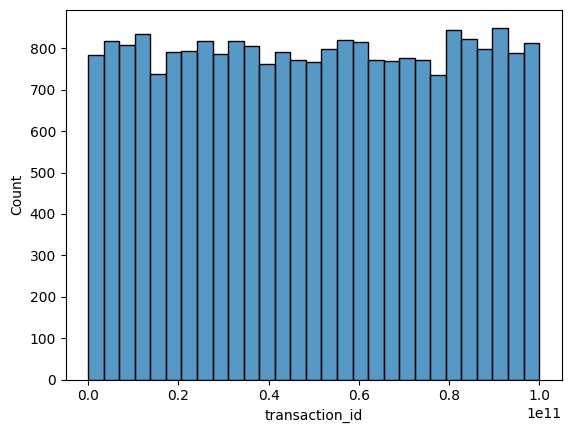

Histogram for cust_id: 


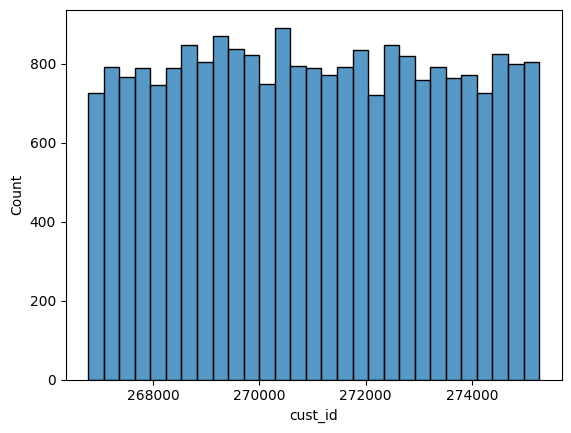

Histogram for Qty: 


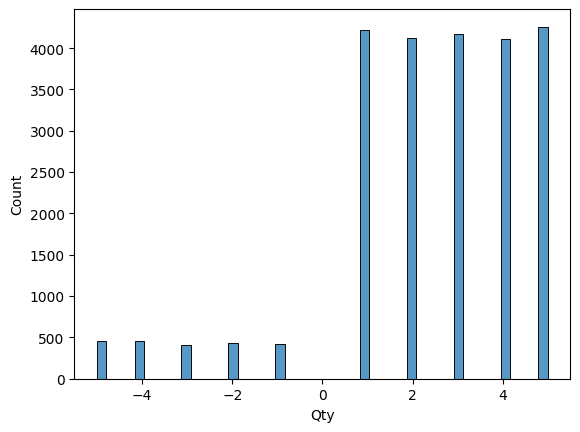

Histogram for Rate: 


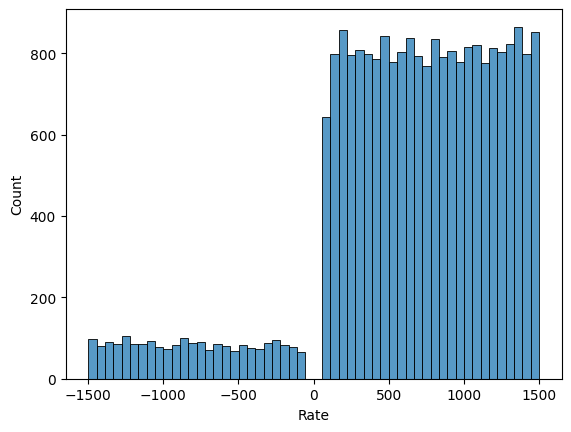

Histogram for Tax: 


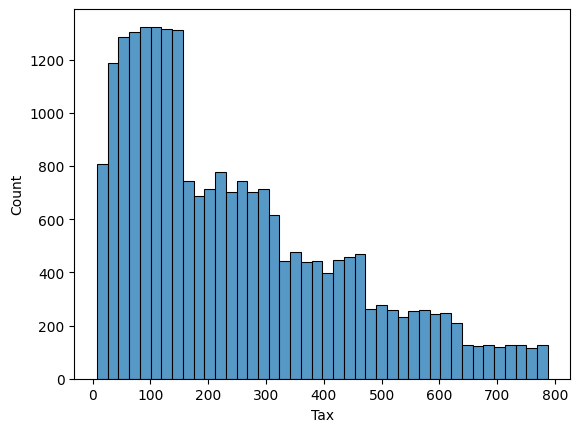

Histogram for total_amt: 


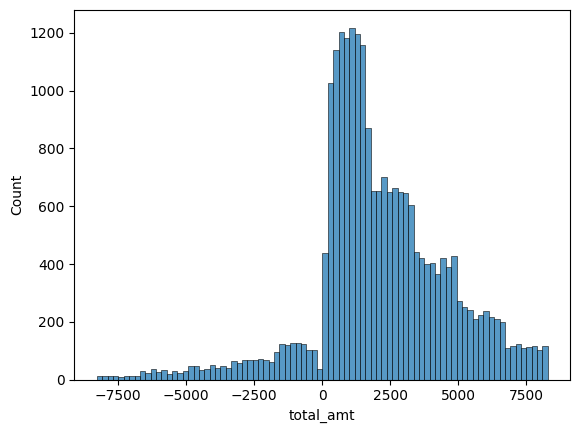

Histogram for customer_Id: 


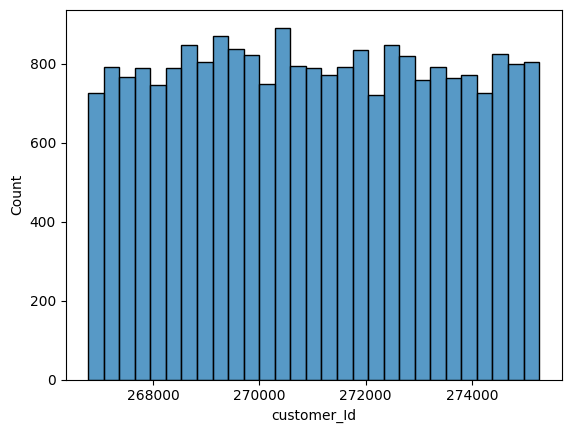

Histogram for city_code: 


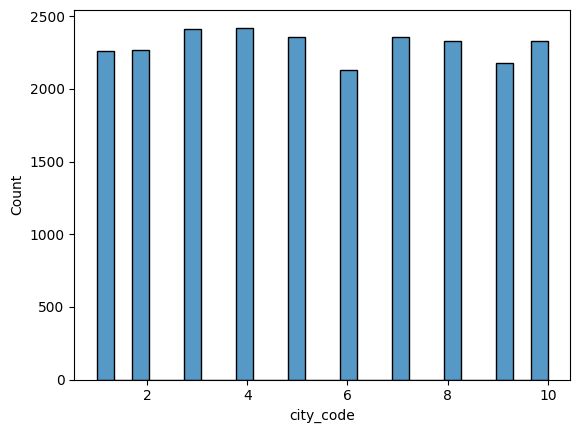

In [29]:
# Histogram for Continuous Variables
for i in Customer_Final.select_dtypes(['int64', 'float64']).columns:
    print(f'Histogram for {i}: ')
    sns.histplot(data=Customer_Final[i])
    plt.show()

Frequency bar for Store_type is: 


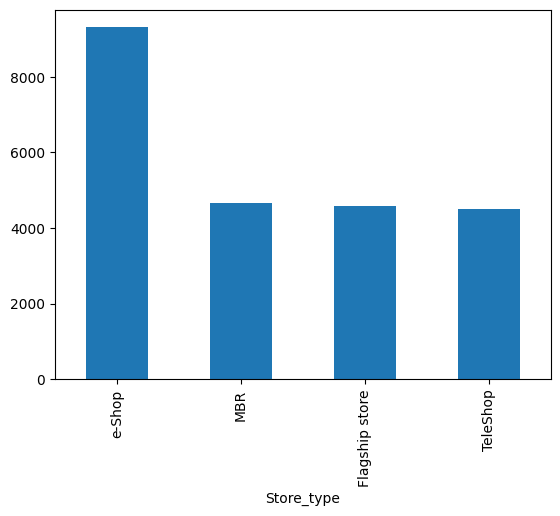

Frequency bar for prod_cat is: 


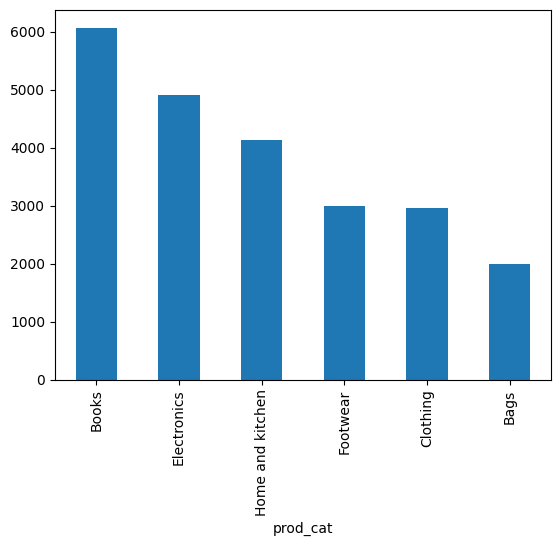

Frequency bar for prod_subcat is: 


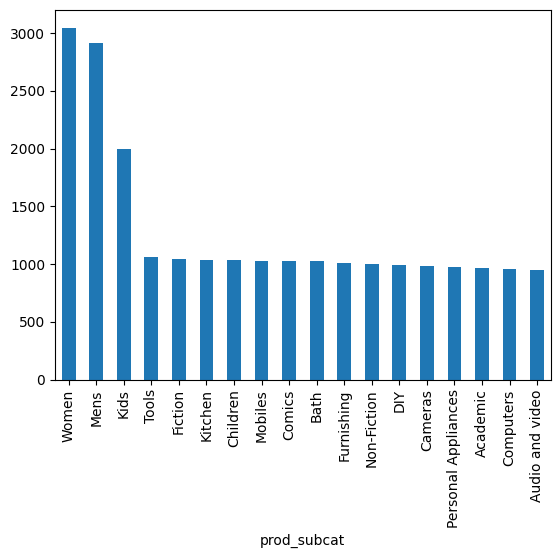

Frequency bar for Gender is: 


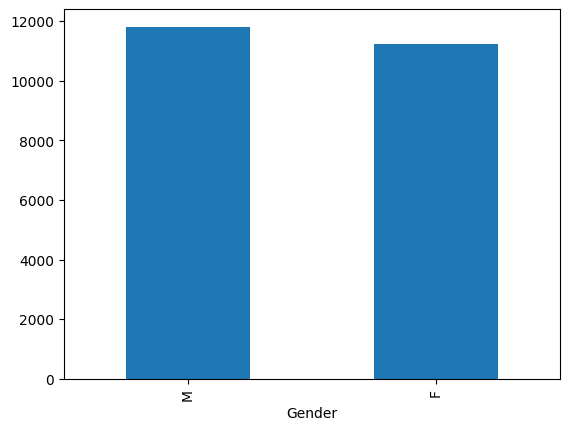

In [30]:
# frequency bars for categorical variables
for i in Customer_Final.select_dtypes('object').columns:
    print(f"Frequency bar for {i} is: ")
    Customer_Final[i].value_counts().plot.bar()
    plt.show()

In [31]:
# Q : Time period of the available transaction data
print(f'{(max(Customer_Final.tran_date) - min(Customer_Final.tran_date)).days} days')

1130 days


In [32]:
# Q :  Count of transactions where the total amount of transaction was negative
negative_txns = (len(Customer_Final[Customer_Final['total_amt'] < 0]))
print(f'no. of txns where total amount is negative is: {negative_txns}')

no. of txns where total amount is negative is: 2177


In [33]:
# Q : Analyze which product categories are more popular among females vs male customers.
top_n = 5
for i in Customer_Final['Gender'].value_counts().index:
    print(f'top {top_n} most popular product categories for gender = {i} are: ')
    print((Customer_Final[Customer_Final['Gender']==i].groupby(['Gender','prod_cat']).count()).nlargest(top_n,'transaction_id').index.get_level_values('prod_cat').to_list())
    print('\n')
    
# output is Top 5 categories. If we want to increase or decrease the number, we just have to change the variable top_n

top 5 most popular product categories for gender = M are: 
['Books', 'Electronics', 'Home and kitchen', 'Clothing', 'Footwear']


top 5 most popular product categories for gender = F are: 
['Books', 'Electronics', 'Home and kitchen', 'Footwear', 'Clothing']




In [34]:
#Q: Which City code has the maximum customers and what was the percentage of customers from that city?
max_city_code = Customer_Final.groupby(['city_code']).count().nlargest(1,'transaction_id').index[0]
percentage_highest = np.round((Customer_Final.groupby(['city_code']).count().nlargest(1,'transaction_id').transaction_id / len(Customer_Final) * 100).values[0],2)

print(f"city code {max_city_code} has maximum customers and its percentage is {percentage_highest}%")


city code 4.0 has maximum customers and its percentage is 10.51%


In [35]:
# Q. : Which store type sells the maximum products by value and by quantity?

store_type_grp = Customer_Final[Customer_Final['total_amt'] > 0].groupby(['Store_type']).agg({'total_amt':'sum', 'Qty':'sum'})

max_quantity_store = store_type_grp['Qty'].idxmax()
max_value_store = store_type_grp['total_amt'].idxmax()

print(f"Store type with maximum products by quantity: {max_quantity_store}")
print(f"Store type with maximum products by value: {max_value_store}")

Store type with maximum products by quantity: e-Shop
Store type with maximum products by value: e-Shop


In [36]:
Customer_Final.prod_cat.unique()

array(['Clothing', 'Electronics', 'Books', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [37]:
# Q. : What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
print(f"the total earned from the 'Electronics' and 'Clothing' categories from Flagship Stores is ${Customer_Final[(Customer_Final['Store_type'] == 'Flagship store') & (Customer_Final['prod_cat'].isin(['Electronics','Clothing']))]['total_amt'].sum()}")

the total earned from the 'Electronics' and 'Clothing' categories from Flagship Stores is $3409559.27


In [38]:
# Q.9 : What was the total amount earned from "Male" customers under the "Electronics" category?
print(f"the total amount earned from 'Male' customers under the 'Electronics' category is ${np.round(Customer_Final[(Customer_Final['Gender'] == 'M') & (Customer_Final['prod_cat'] == 'Electronics')]['total_amt'].sum(),2)}")

the total amount earned from 'Male' customers under the 'Electronics' category is $5703109.42


In [39]:
# Q.10: How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
print(f"The no. of customers which have more than 10 unique transactions, after removing all transactions which have any negative amounts is {(Customer_Final[Customer_Final['total_amt'] >= 0].groupby(['cust_id'])['transaction_id'].nunique() > 10).sum()}")

The no. of customers which have more than 10 unique transactions, after removing all transactions which have any negative amounts is 6


In [40]:
# Q.11(a). For all customers aged between 25 - 35, find out: What was the total amount spent for “Electronics” and “Books” product categories?

In [52]:
def age(born):
    """
    function to calculate age of customer
    """
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) <  (born.month, born.day))
    

In [54]:
# adding a new column named 'age'
Customer_Final['age'] = Customer_Final['DOB'].apply(age)

In [62]:
print(f"the total amount spent for “Electronics” and “Books” product categories for customers aged between 25 - 35 is ${np.round((Customer_Final[(Customer_Final['age'] >= 25) & (Customer_Final['age'] <= 35) & (Customer_Final['prod_cat'].isin(['Books', 'Electronics'])) & (  Customer_Final['total_amt'] > 0)]['total_amt'].sum()),2)}")

the total amount spent for “Electronics” and “Books” product categories for customers aged between 25 - 35 is $6144090.62


In [65]:

# Q.11(b) : For all customers aged between 25 - 35, What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014
print(f"the total amount spent by the customers between 1st Jan, 2014 to 1st Mar, 2014 for customers aged between 25 - 35 is ${np.round((Customer_Final[(Customer_Final['age'] >= 25) & (Customer_Final['age'] <= 35) & (Customer_Final['tran_date'] >= '2014-01-01') & (Customer_Final['tran_date'] <= '2014-03-01') & (Customer_Final['total_amt'] > 0)]['total_amt'].sum()),2)}")

the total amount spent by the customers between 1st Jan, 2014 to 1st Mar, 2014 for customers aged between 25 - 35 is $672040.01
